In [30]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [31]:
data = pd.read_csv(r"C:\Users\goyal\OneDrive\Desktop\NLP\AML Assignment\ML Project_Term3\forestfires.csv")
data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [32]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [33]:
#The first column seems to be just index
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [35]:
# Get list of categorical variables
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['month', 'day']


In [36]:
#Label encoding the data to get rid of object dtype.
# Make copy to avoid changing original data 
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [37]:
label_data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


<Axes: >

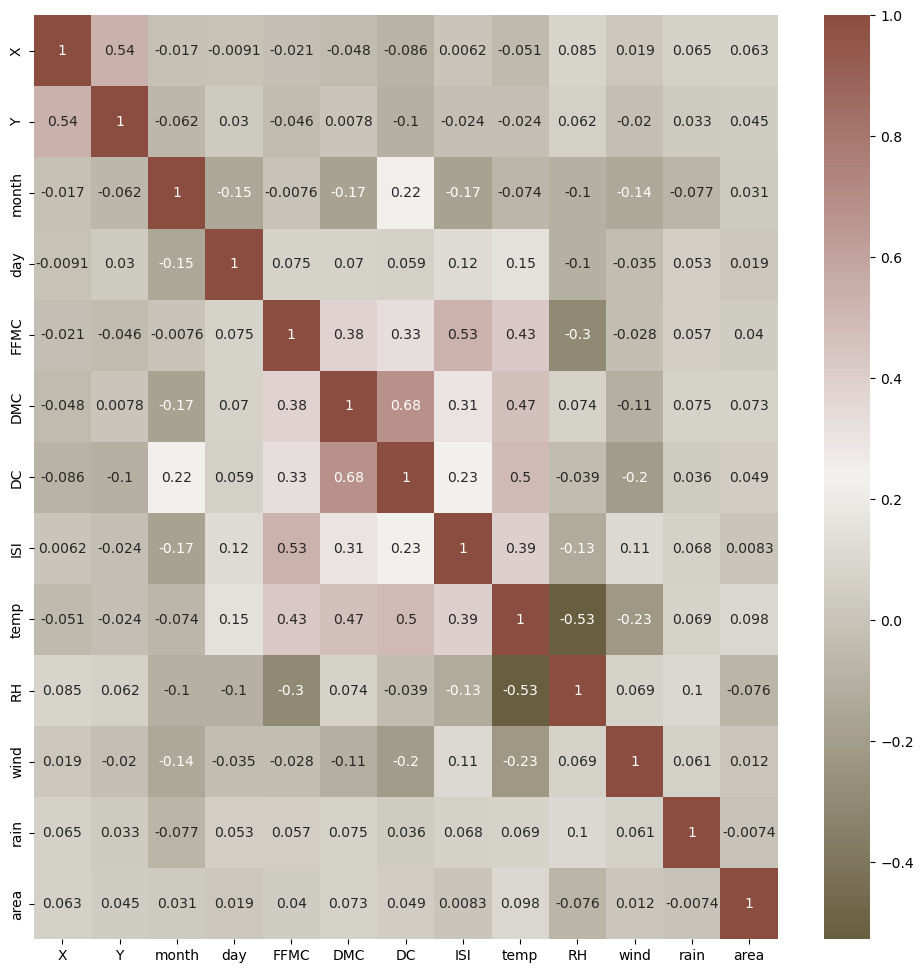

In [38]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [39]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["area"],axis =1)
y= label_data["area"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)


In [10]:
# #Implementation of PCA

# PCA = PCA (n_components = 1)  
# #fitting the PCA model on the X_train dataset, the transform method is used to transform both the X_train and X_test datasets   
# X_train = PCA.fit_transform(X_train)  
# X_test = PCA.transform(X_test)  

# #explained_variance_ratio_ attribute returns a one-dimensional array containing the amount of variance explained by each of the selected principal components   


In [40]:
from sklearn.decomposition import PCA  
   
X_regression = label_data.drop(columns=['area'])
scaler = StandardScaler()
X_regression_scaled = scaler.fit_transform(X_regression)
pca = PCA(n_components=2)
X_regression_pca = pca.fit_transform(X_regression_scaled)



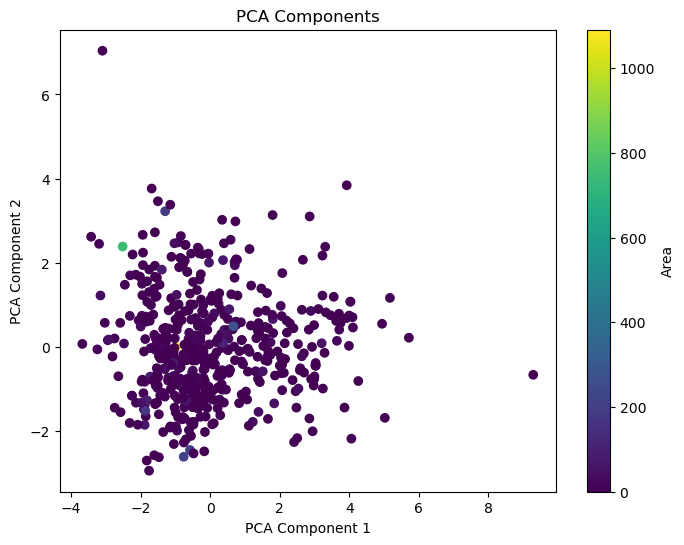

In [42]:
# Scatter plot of PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_regression_pca[:, 0], X_regression_pca[:, 1], c=label_data['area'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Components')
plt.colorbar(label='Area')
plt.show()


In [65]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the models
rf_reg = RandomForestRegressor()

# Train the models on the training set
rf_reg.fit(X_train, y_train)

# Predict the values for the test set using the trained models
rf_pred = rf_reg.predict(X_test)

# Calculate the MSE for each model
rf_mse = mean_squared_error(y_test, rf_pred)

print("Random Forest Regression MSE:", rf_mse)

Random Forest Regression MSE: 2559.9195132770806


In [66]:
# Fitting the lasso regression model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)



# Predicting on test set using lasso regression model
y_pred_lasso = lasso_reg.predict(X_test)



# Calculating MSE for lasso regression model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error for Lasso Regression:", mse_lasso)


Mean Squared Error for Lasso Regression: 1397.9808436148944


In [73]:
# Fitting the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


# Fitting the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predicting on test set using SVR model
y_pred_svr = svr.predict(X_test)

# Predicting on test set using linear regression model
y_pred_lin = lin_reg.predict(X_test)

# Calculating MSE for SVR model
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error for SVR:", mse_svr)

# Calculating MSE for linear regression model
mse_lin = mean_squared_error(y_test, y_pred_lin)
print("Mean Squared Error for linear regression:", mse_lin)

Mean Squared Error for SVR: 1493.3315587358597
Mean Squared Error for linear regression: 1399.135011703556


In [46]:
# Fitting the XGBoost Regressor model
xgboost_reg = xgb.XGBRegressor()
xgboost_reg.fit(X_train, y_train)

# Predicting on test set using XGBoost Regressor model
y_pred_xgboost = xgboost_reg.predict(X_test)

# Calculating MSE for XGBoost Regressor model
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
print("Mean Squared Error for XGBoost Regressor:", mse_xgboost)

Mean Squared Error for XGBoost Regressor: 9862.948715481874


In [47]:
# Fitting the Decision Tree Regression model
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# Predicting on test set using Decision Tree Regression model
y_pred_dtr = dtr.predict(X_test)

# Calculating MSE for Decision Tree Regression model
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
print("Mean Squared Error for Decision Tree Regression:", mse_dtr)

Mean Squared Error for Decision Tree Regression: 10528.50063


In [48]:
#We get MSE less for all types og regression algorithms, where the MSE for Lasso Regression is the minimum and efficient one
print("Mean Squared Error for Lasso Regression:", mse_lasso)
print("Mean Squared Error for Random Forest Regression:", rf_mse)
print("Mean Squared Error for linear regression:", mse_lin)
print("Mean Squared Error for SVR:", mse_svr)
print("Mean Squared Error for Decision Tree Regression:", mse_dtr)
print("Mean Squared Error for XGBoost Regressor:", mse_xgboost)

Mean Squared Error for Lasso Regression: 1644.226330569032
Mean Squared Error for Random Forest Regression: 3093.2792633169092
Mean Squared Error for linear regression: 1644.0893332173391
Mean Squared Error for SVR: 1786.3718013855905
Mean Squared Error for Decision Tree Regression: 10528.50063
Mean Squared Error for XGBoost Regressor: 9862.948715481874


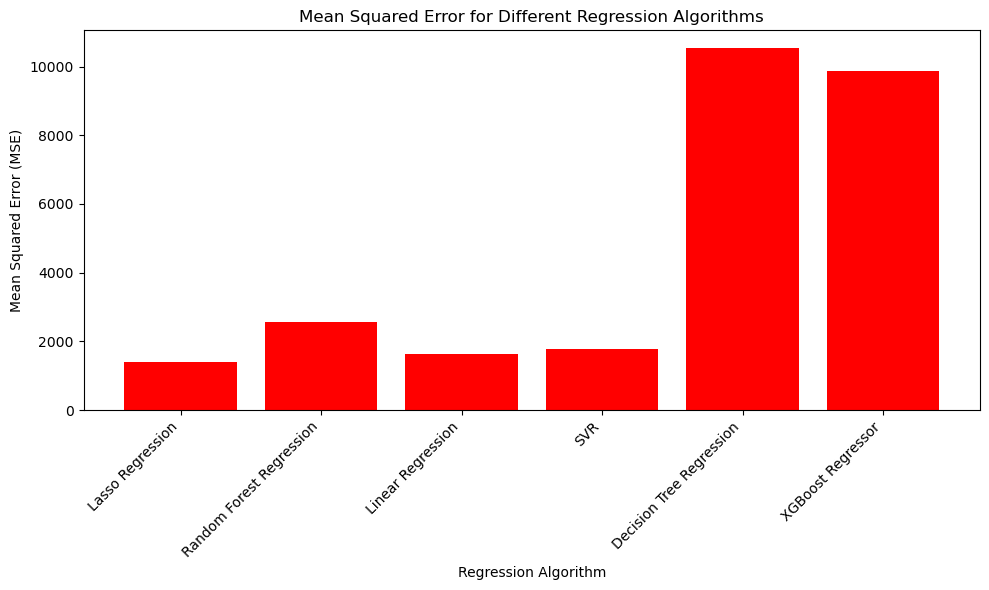

In [70]:
import matplotlib.pyplot as plt

# Define the MSE scores for each regression algorithm
mse_scores = {
    "Lasso Regression": mse_lasso,
    "Random Forest Regression": rf_mse,
    "Linear Regression": mse_lin,
    "SVR": mse_svr,
    "Decision Tree Regression": mse_dtr,
    "XGBoost Regressor": mse_xgboost
}

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(mse_scores.keys(), mse_scores.values(), color='red')
plt.xlabel('Regression Algorithm')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error for Different Regression Algorithms')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [53]:
#Importing all the required packages for the Neural Network to be implemented 
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd


# Assigning the features as X and target as y
X = label_data.drop(["area"], axis=1)
y = label_data["area"]

# Keeping only the first 9 features in X
X = X.iloc[:, :9]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Performing preprocessing part
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Define the neural network model built using keras API
model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=150, batch_size=10, verbose=1)

# Evaluate the model on the testing set
scores = model.evaluate(X_test_scaled, y_test)
print("\nMean Absolute Error (MAE): %.2f" % scores[1])


Epoch 1/150


37/37 [==============================] - 2s 5ms/step - loss: 5375.0020 - mae: 13.2057
Epoch 2/150
37/37 [==============================] - 0s 4ms/step - loss: 5351.2578 - mae: 13.2400
Epoch 3/150
37/37 [==============================] - 0s 4ms/step - loss: 5320.3564 - mae: 13.4337
Epoch 4/150
37/37 [==============================] - 0s 3ms/step - loss: 5287.3379 - mae: 13.9268
Epoch 5/150
37/37 [==============================] - 0s 4ms/step - loss: 5254.1597 - mae: 14.6115
Epoch 6/150
37/37 [==============================] - 0s 4ms/step - loss: 5219.3184 - mae: 15.3215
Epoch 7/150
37/37 [==============================] - 0s 4ms/step - loss: 5194.8149 - mae: 16.2659
Epoch 8/150
37/37 [==============================] - 0s 4ms/step - loss: 5165.3916 - mae: 16.8324
Epoch 9/150
37/37 [==============================] - 0s 4ms/step - loss: 5142.5034 - mae: 17.2018
Epoch 10/150
37/37 [==============================] - 0s 7ms/step - loss: 5125.2837 - mae: 17.7233
Epoch 11/150
37/3